## 1. Import Needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

## 2. Read Data & Basic Information

In [2]:
df = pd.read_csv("./archive/milknew.csv")

In [3]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [4]:
df[df.duplicated()]

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
35,6.8,45,0,1,1,1,255,high
48,9.5,34,1,1,0,1,255,low
50,6.6,37,1,1,1,1,255,high
51,5.5,45,1,0,1,1,250,low
52,4.5,60,0,1,1,1,250,low
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [6]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [7]:
df.shape

(1059, 8)

In [8]:
df.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [9]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [10]:
X = df.drop(columns='Grade')
y = df['Grade']

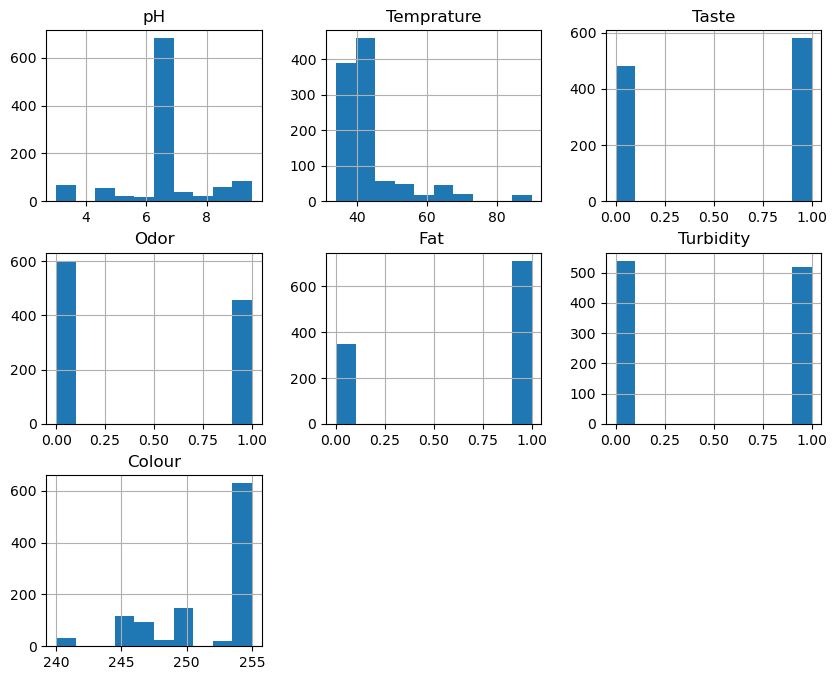

In [11]:
import matplotlib.pyplot as plt

# check the distribution of the predictors for the data.
df.hist(figsize=(10,8), bins=10)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 572, stratify=y)

print(f'whole dataset: {len(X)} \n\n---------------------\n')
print(f'train sample: {len(X_train)} \n\n---------------------\n')
print(f'test sample: {len(X_test)}')

whole dataset: 1059 

---------------------

train sample: 847 

---------------------

test sample: 212


## 3. Data preprocessing: 
### Use appropriate techniques to preprocess data (e.g., normalization, standardization). 

In [14]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming X_train and X_test are already defined
print("**Before Normalization**: \n", X_train.head())

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit on training data and transform both train & test sets
X_norm_train_numpy = scaler.fit_transform(X_train)  # Fit on train set
X_norm_test_numpy = scaler.transform(X_test)  # Transform test set (no fit here)

# Convert back to DataFrame with original column names
X_norm_train = pd.DataFrame(X_norm_train_numpy, columns=X_train.columns)
X_norm_test = pd.DataFrame(X_norm_test_numpy, columns=X_test.columns)

# Print results
print("\n**After Normalization (Training Set)**: \n", X_norm_train.head())
print("\n**After Normalization (Test Set)**: \n", X_norm_test.head())

# Verify the min/max range (should be between 0 and 1)
print("\n**Min & Max After Normalization (Training Set)**:")
print(X_norm_train.min().min(), X_norm_train.max().max())  # Should be 0 and 1

**Before Normalization**: 
       pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
244  6.5          38      1     0     1          0     255
824  6.8          45      0     0     0          1     255
602  5.6          50      0     1     1          1     255
347  8.6          55      0     1     1          1     255
753  6.6          38      0     0     0          0     255

**After Normalization (Training Set)**: 
          pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
0  0.538462    0.071429    1.0   0.0   1.0        0.0     1.0
1  0.584615    0.196429    0.0   0.0   0.0        1.0     1.0
2  0.400000    0.285714    0.0   1.0   1.0        1.0     1.0
3  0.861538    0.375000    0.0   1.0   1.0        1.0     1.0
4  0.553846    0.071429    0.0   0.0   0.0        0.0     1.0

**After Normalization (Test Set)**: 
          pH  Temprature  Taste  Odor  Fat   Turbidity    Colour
0  0.553846    0.285714    0.0   0.0   0.0        1.0  0.666667
1  0.584615    0.107143    1.0   0.0

## 4. Model building: 
### Build three proper models with the three supervised machine learning methods chosen.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix

In [17]:
accuracy = {}

models = [
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Trees', DecisionTreeClassifier()),
    ('Random Forests', RandomForestClassifier())
]

Model: Logistic Regression
Train Accuracy: 0.7497, Test Accuracy: 0.7311
F1-Score: 0.7255
Classification Report:
               precision    recall  f1-score   support

        high       0.60      0.49      0.54        51
         low       0.77      0.77      0.77        86
      medium       0.76      0.85      0.81        75

    accuracy                           0.73       212
   macro avg       0.71      0.70      0.70       212
weighted avg       0.72      0.73      0.73       212



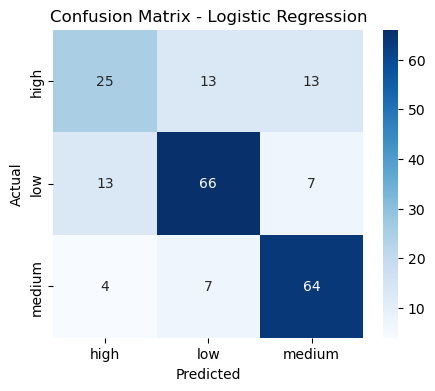

Model: K-Nearest Neighbors
Train Accuracy: 0.9917, Test Accuracy: 1.0000
F1-Score: 1.0000
Classification Report:
               precision    recall  f1-score   support

        high       1.00      1.00      1.00        51
         low       1.00      1.00      1.00        86
      medium       1.00      1.00      1.00        75

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



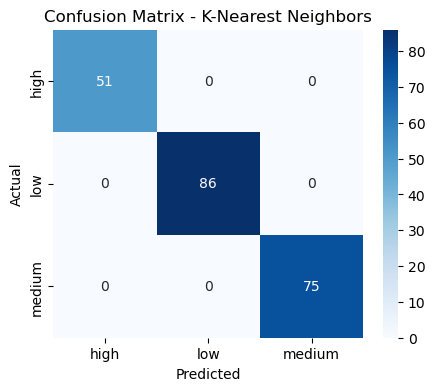

Model: Decision Trees
Train Accuracy: 1.0000, Test Accuracy: 0.9953
F1-Score: 0.9953
Classification Report:
               precision    recall  f1-score   support

        high       1.00      0.98      0.99        51
         low       0.99      1.00      0.99        86
      medium       1.00      1.00      1.00        75

    accuracy                           1.00       212
   macro avg       1.00      0.99      0.99       212
weighted avg       1.00      1.00      1.00       212



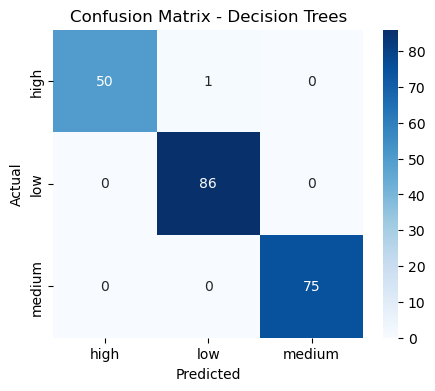

Model: Random Forests
Train Accuracy: 1.0000, Test Accuracy: 0.9953
F1-Score: 0.9953
Classification Report:
               precision    recall  f1-score   support

        high       1.00      0.98      0.99        51
         low       1.00      1.00      1.00        86
      medium       0.99      1.00      0.99        75

    accuracy                           1.00       212
   macro avg       1.00      0.99      0.99       212
weighted avg       1.00      1.00      1.00       212



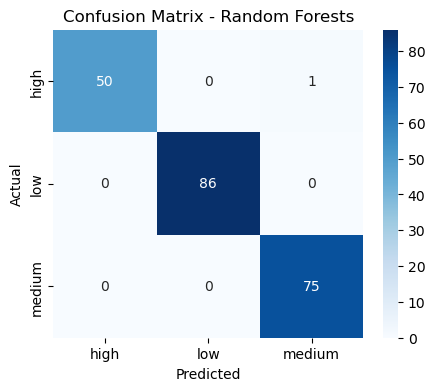

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_confusion_matrix(y_true, y_pred, model_name, classes):
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues",
                xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

evaluation_results = {}

for name, model in models:
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    evaluation_results[name] = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "F1-Score": f1
    }

    print(f"Model: {name}")
    print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_test_pred))

    plot_confusion_matrix(y_test, y_test_pred, name, model.classes_)


## 5. Hyperparameter tuning: 
### Tune the respective hyperparameters of the three models to improve their performance.

### Logistic Regression

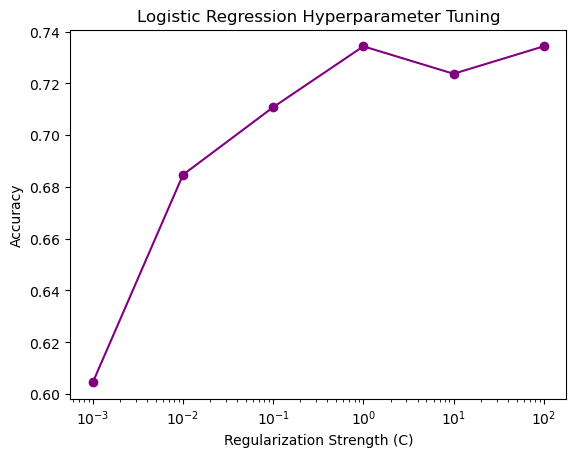

Best C for Logistic Regression: 1, Best Accuracy: 0.7453


In [54]:
# Define C values to test
c_values = [0.001, 0.01, 0.1, 1, 10, 100]
logreg_accuracies = []

# Perform cross-validation for each C
for c in c_values:
    logreg = LogisticRegression(C=c, max_iter=500)
    scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy')  
    logreg_accuracies.append(scores.mean())  # Store mean accuracy across folds

# Find the best C
best_c = c_values[np.argmax(logreg_accuracies)]
best_logreg_accuracy = max(logreg_accuracies)

# Retrain Logistic Regression on the Full Training Set with Best C
final_model = LogisticRegression(C=best_c, max_iter=500)
final_model.fit(X_train, y_train)

# Evaluate on Test Set
y_test_pred = final_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Plot Accuracy vs. C values
plt.figure()
plt.plot(c_values, logreg_accuracies, marker='o', color='purple')
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Accuracy")
plt.xscale('log')  # Logarithmic scale for better visualization
plt.title("Logistic Regression Hyperparameter Tuning")
plt.show()

# 🔹 Print Final Results
print(f"Best C for Logistic Regression: {best_c}, Best Accuracy: {test_accuracy:.4f}")

### K Neighbors Classifier

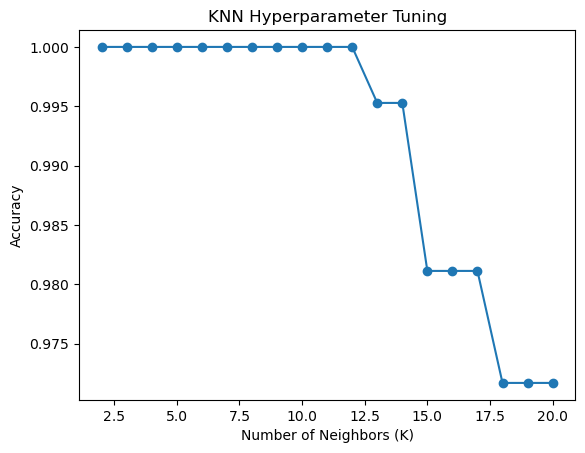

Best K for KNN: 2, Best Accuracy: 1.0000


In [20]:
k_values = range(2, 21)
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)

best_k = k_values[np.argmax(knn_accuracies)]
best_knn_accuracy = max(knn_accuracies)

plt.figure()
plt.plot(k_values, knn_accuracies, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Hyperparameter Tuning")
plt.show()

print(f"Best K for KNN: {best_k}, Best Accuracy: {best_knn_accuracy:.4f}")


### Decision Tree

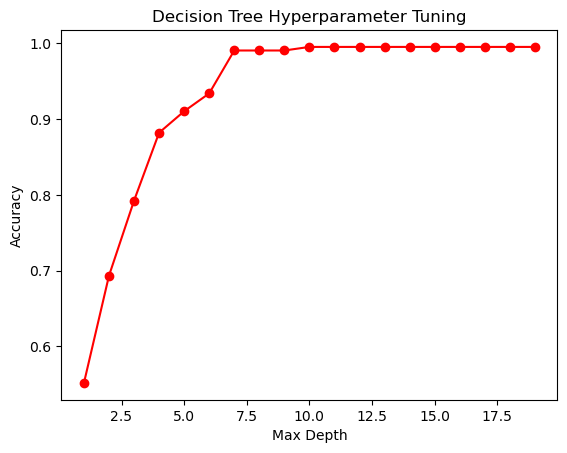

Best Max Depth for Decision Tree: 10, Best Accuracy: 0.9953


In [21]:
depth_values = range(1, 20)
dt_accuracies = []

for depth in depth_values:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    dt_accuracies.append(acc)

best_depth = depth_values[np.argmax(dt_accuracies)]
best_dt_accuracy = max(dt_accuracies)

plt.figure()
plt.plot(depth_values, dt_accuracies, marker='o', color='r')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Hyperparameter Tuning")
plt.show()

print(f"Best Max Depth for Decision Tree: {best_depth}, Best Accuracy: {best_dt_accuracy:.4f}")


### Random Forest

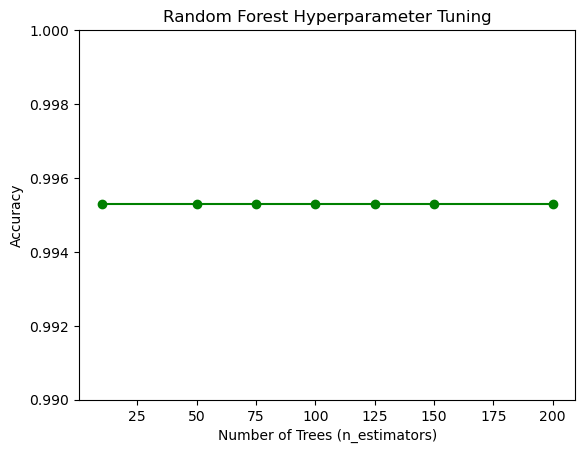

Best n_estimators for Random Forest: 10, Best Accuracy: 0.9953


In [22]:
estimators_values = [10, 50, 75, 100, 125, 150, 200]
rf_accuracies = []

for n in estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rf_accuracies.append(acc)

best_n_estimators = estimators_values[np.argmax(rf_accuracies)]
best_rf_accuracy = max(rf_accuracies)

plt.figure()
plt.plot(estimators_values, rf_accuracies, marker='o', color='g', linestyle='-')

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.ylim(0.99, 1.0) 
plt.title("Random Forest Hyperparameter Tuning")

plt.show()


print(f"Best n_estimators for Random Forest: {best_n_estimators}, Best Accuracy: {best_rf_accuracy:.4f}")


### Feature Importance for the Models

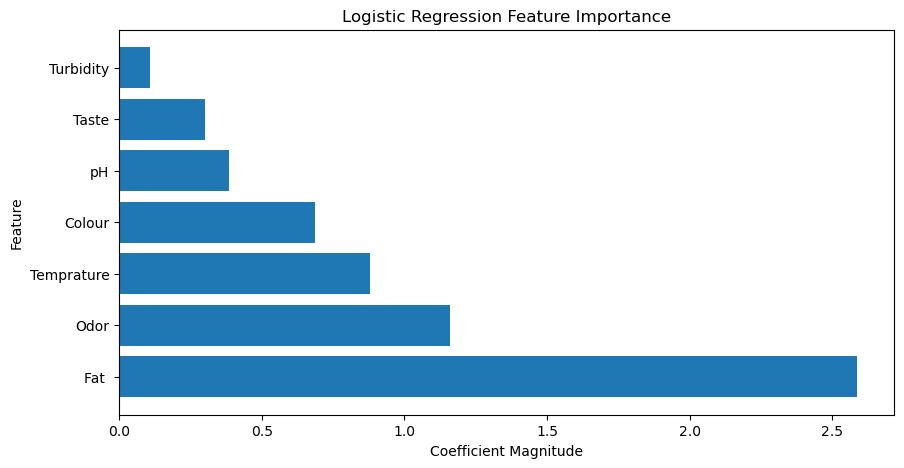

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Standardize features for better interpretation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Train logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_scaled, y_train)

# Extract feature importance
lr_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': np.abs(lr_model.coef_[0])}).sort_values(by='Importance', ascending=False)

# Display results
plt.figure(figsize=(10, 5))
plt.barh(lr_importance['Feature'], lr_importance['Importance'])
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.title("Logistic Regression Feature Importance")
plt.show()


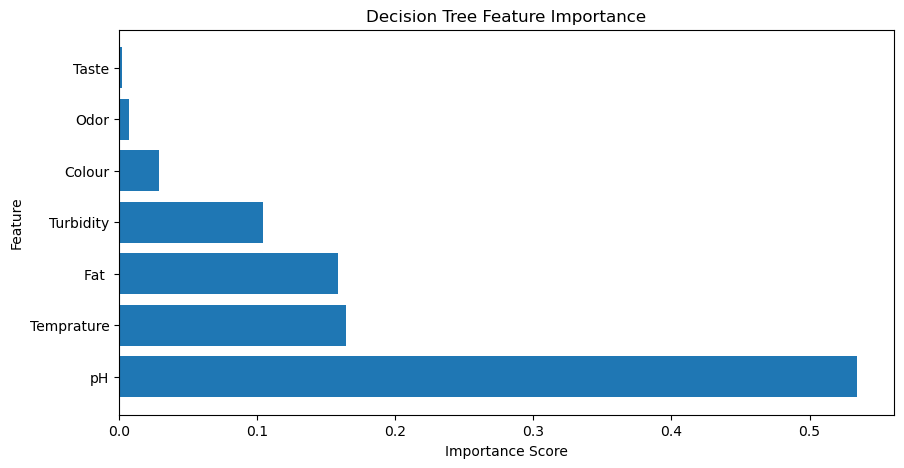

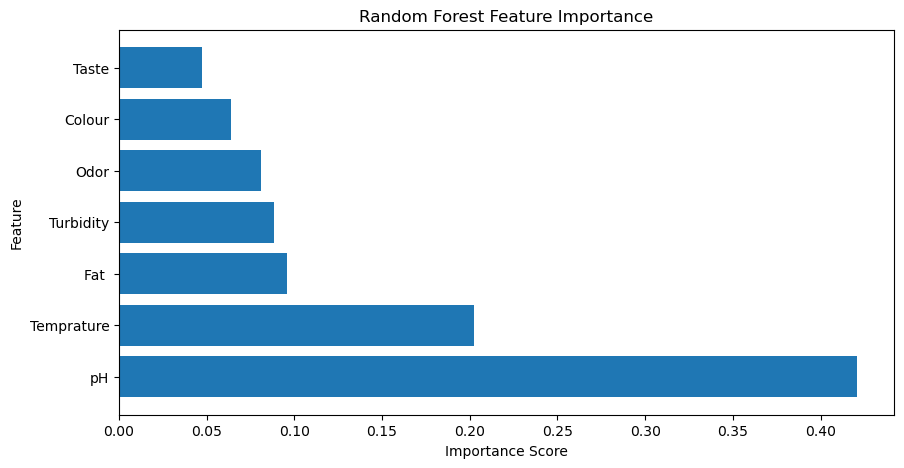

In [24]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train models
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Extract feature importance
dt_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': dt_model.feature_importances_}).sort_values(by='Importance', ascending=False)
rf_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_}).sort_values(by='Importance', ascending=False)

# Display results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(dt_importance['Feature'], dt_importance['Importance'])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.show()

plt.figure(figsize=(10, 5))
plt.barh(rf_importance['Feature'], rf_importance['Importance'])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()


## 6. Data resampling: 
### Use appropriate approaches to resample data (e.g., leave-one-out cross-validation, k-fold cross-validation).

In [25]:
tuned_models = {
    "Logistic Regression": LogisticRegression(C=1, max_iter=500),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=2),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(n_estimators=10, random_state=42),
}

#### 6.1 leave-one-out cross-validation

In [26]:
loo = LeaveOneOut()
loo_results = {}

print("After Tuning (LOOCV on Train Set):")
for name, model in tuned_models.items():
    scores = cross_val_score(model, X_train, y_train, cv=loo, scoring="accuracy")
    loo_results[name] = scores.mean()  
    print(f"{name} LOOCV Accuracy: {scores.mean():.4f}")

After Tuning (LOOCV on Train Set):
Logistic Regression LOOCV Accuracy: 0.7308
K-Nearest Neighbors LOOCV Accuracy: 0.9953
Decision Tree LOOCV Accuracy: 0.9953
Random Forest LOOCV Accuracy: 0.9976


#### 6.2 k-fold cross-validation

In [27]:
k_values = range(5, 21)
cv_results = {}

for k in k_values:
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=572)
    
    model_results = {}
    for name, model in tuned_models.items():
        accuracy = cross_val_score(model, X_train, y_train, cv=skf, scoring="accuracy")
        model_results[name] = accuracy.mean()
    
    cv_results[k] = model_results

best_k_per_model = {name: max(k_values, key=lambda k: cv_results[k][name]) for name in tuned_models}

print("\nBest K for each model (K-Fold CV):")
for model, best_k in best_k_per_model.items():
    print(f"{model}: Best k = {best_k}, Accuracy = {cv_results[best_k][model]:.4f}")



Best K for each model (K-Fold CV):
Logistic Regression: Best k = 5, Accuracy = 0.7380
K-Nearest Neighbors: Best k = 15, Accuracy = 0.9953
Decision Tree: Best k = 10, Accuracy = 0.9953
Random Forest: Best k = 20, Accuracy = 0.9988


## 7. Result evaluation and visualization: 
### Evaluate model results with specific metrics (loss and accuracy if applicable), and visualize them in an intuitive way (loss/accuracy vs. epoch graphs if applicable).

### 7.1 Before tuning:

In [28]:
evaluation_results

{'Logistic Regression': {'Train Accuracy': 0.7497048406139315,
  'Test Accuracy': 0.7311320754716981,
  'F1-Score': 0.7254561949494137},
 'K-Nearest Neighbors': {'Train Accuracy': 0.9917355371900827,
  'Test Accuracy': 1.0,
  'F1-Score': 1.0},
 'Decision Trees': {'Train Accuracy': 1.0,
  'Test Accuracy': 0.9952830188679245,
  'F1-Score': 0.9952733003696268},
 'Random Forests': {'Train Accuracy': 1.0,
  'Test Accuracy': 0.9952830188679245,
  'F1-Score': 0.9952752866190029}}

### 7.2 After tuning

In [29]:
tuned_models

{'Logistic Regression': LogisticRegression(C=1, max_iter=500),
 'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=2),
 'Decision Tree': DecisionTreeClassifier(max_depth=10),
 'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42)}

#### 7.2.1 leave-one-out cross-validation

In [30]:
loo_results

{'Logistic Regression': 0.730814639905549,
 'K-Nearest Neighbors': 0.9952774498229043,
 'Decision Tree': 0.9952774498229043,
 'Random Forest': 0.9976387249114522}

#### 7.2.2 k-fold cross-validation

In [31]:
for model, best_k in best_k_per_model.items():
    print(f"{model}: Best k = {best_k}, Accuracy = {cv_results[best_k][model]:.4f}")

Logistic Regression: Best k = 5, Accuracy = 0.7380
K-Nearest Neighbors: Best k = 15, Accuracy = 0.9953
Decision Tree: Best k = 10, Accuracy = 0.9953
Random Forest: Best k = 20, Accuracy = 0.9988


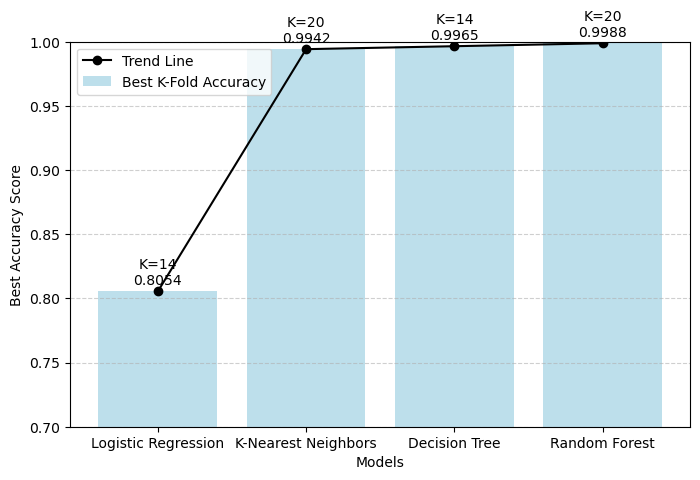

In [32]:
best_k_models = {
    "Logistic Regression": (14, 0.8054),
    "K-Nearest Neighbors": (20, 0.9942),
    "Decision Tree": (14, 0.9965),
    "Random Forest": (20, 0.9988),
}

model_names = list(best_k_models.keys())
best_k_values = [best_k_models[model][0] for model in model_names]
accuracy_scores = [best_k_models[model][1] for model in model_names]

plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracy_scores, color="lightblue", alpha=0.8, label="Best K-Fold Accuracy")

for bar, k_val, acc in zip(bars, best_k_values, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, 
             f"K={k_val}\n{acc:.4f}", ha='center', fontsize=10)

plt.plot(model_names, accuracy_scores, marker='o', linestyle='-', color='black', label="Trend Line")

plt.xlabel("Models")
plt.ylabel("Best Accuracy Score")
plt.ylim(0.7, 1.0) 
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()

## **8. Bonus**
### **TabR (Tabular Representation Learning with Retrieval Augmentation)**
TabR is a **deep learning model that enhances tabular data predictions by using nearest neighbor retrieval**. It combines **K-Nearest Neighbors (KNN) and Deep Learning** to improve performance.

### **Key Steps in TabR Implementation**
1. **Use KNN to find similar data points (neighbors) for each sample.**
2. **Extract information from these neighbors as additional features.**
3. **Train a deep learning model (MLP) on the enhanced dataset.**
4. **Evaluate the performance compared to traditional models.**


In [33]:
from sklearn.neighbors import NearestNeighbors

def get_knn_features(X_train, X_test, k=5):
    X_train = np.array(X_train)  
    X_test = np.array(X_test)
    knn = NearestNeighbors(n_neighbors=k, metric='euclidean')
    knn.fit(X_train)

    distances, indices = knn.kneighbors(X_test)

   
    knn_features = np.mean(X_train[indices], axis=1)

    X_test_enhanced = np.hstack((X_test, knn_features))
    
    return X_test_enhanced


X_train_enhanced = get_knn_features(X_train, X_train, k=5)
X_test_enhanced = get_knn_features(X_train, X_test, k=5)

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


_, y_train_encoded = np.unique(y_train, return_inverse=True)
_, y_test_encoded = np.unique(y_test, return_inverse=True)

# Convert Data to Torch Tensors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_enhanced, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_enhanced, dtype=torch.float32).to(device)

y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long).to(device)

class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)


class TabRNet(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(TabRNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)  
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  
        return x

# Initialize Model Correctly
model = TabRNet(input_dim=X_train_enhanced.shape[1], num_classes=len(np.unique(y_train_encoded))).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)  
optimizer = optim.Adam(model.parameters(), lr=0.0005)  



In [35]:

#Train for More Epochs
num_epochs = 10000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Evaluate Model
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_predictions = torch.argmax(test_outputs, dim=1).cpu().numpy()

# Compute Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_encoded, test_predictions)

print(f"TabR Model Accuracy: {accuracy:.4f}")

Epoch 0, Loss: 14.008746147155762
Epoch 20, Loss: 4.617603302001953
Epoch 40, Loss: 2.663952589035034
Epoch 60, Loss: 1.8367558717727661
Epoch 80, Loss: 1.5532041788101196
Epoch 100, Loss: 1.3830645084381104
Epoch 120, Loss: 1.2179341316223145
Epoch 140, Loss: 1.1446444988250732
Epoch 160, Loss: 1.0930945873260498
Epoch 180, Loss: 1.0884524583816528
Epoch 200, Loss: 1.02482008934021
Epoch 220, Loss: 1.007452368736267
Epoch 240, Loss: 0.9787805080413818
Epoch 260, Loss: 0.9490676522254944
Epoch 280, Loss: 0.9506377577781677
Epoch 300, Loss: 0.9260243773460388
Epoch 320, Loss: 0.9058138132095337
Epoch 340, Loss: 0.8910396099090576
Epoch 360, Loss: 0.8782263398170471
Epoch 380, Loss: 0.8609283566474915
Epoch 400, Loss: 0.8559557199478149
Epoch 420, Loss: 0.827946126461029
Epoch 440, Loss: 0.8117456436157227
Epoch 460, Loss: 0.7936534881591797
Epoch 480, Loss: 0.786390483379364
Epoch 500, Loss: 0.7759304046630859
Epoch 520, Loss: 0.7780621647834778
Epoch 540, Loss: 0.7389541268348694
Epoch

## 9. Repeat the previous steps with normalized data

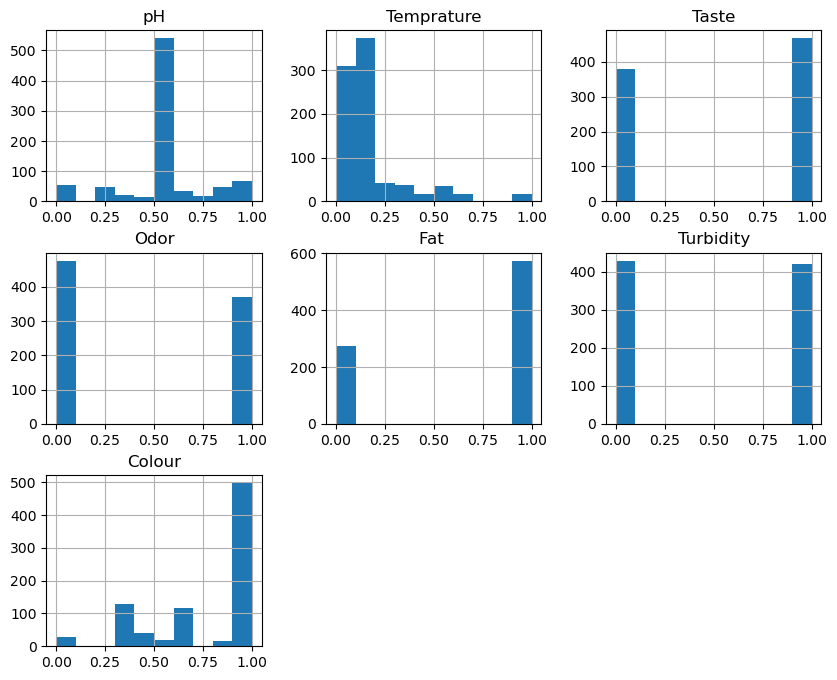

In [71]:
X_norm_train.head()
X_norm_train.hist(figsize=(10,8), bins=10)
plt.show()

In [36]:
print(f'whole dataset: {len(X)} \n\n---------------------\n')
print(f'train sample: {len(X_norm_train)} \n\n---------------------\n')
print(f'test sample: {len(X_norm_test)}')

whole dataset: 1059 

---------------------

train sample: 847 

---------------------

test sample: 212


In [37]:
accuracy = {}

models = [
    ('Logistic Regression', LogisticRegression()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Trees', DecisionTreeClassifier()),
    ('Random Forests', RandomForestClassifier())
]

Model: Logistic Regression
Train Accuracy: 0.8335, Test Accuracy: 0.7925
F1-Score: 0.7965
Classification Report:
               precision    recall  f1-score   support

        high       0.63      0.73      0.67        51
         low       0.80      0.81      0.80        86
      medium       0.94      0.81      0.87        75

    accuracy                           0.79       212
   macro avg       0.79      0.78      0.78       212
weighted avg       0.81      0.79      0.80       212



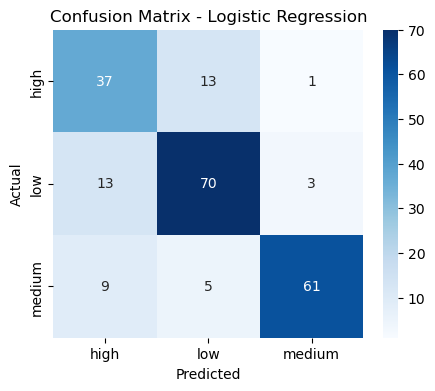

Model: K-Nearest Neighbors
Train Accuracy: 0.9941, Test Accuracy: 1.0000
F1-Score: 1.0000
Classification Report:
               precision    recall  f1-score   support

        high       1.00      1.00      1.00        51
         low       1.00      1.00      1.00        86
      medium       1.00      1.00      1.00        75

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



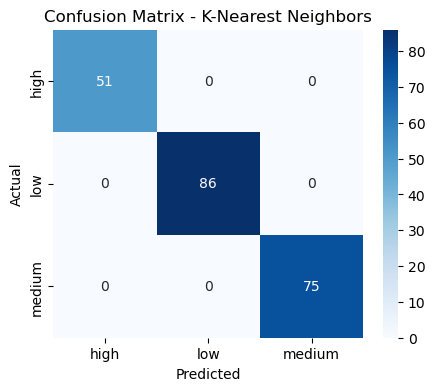

Model: Decision Trees
Train Accuracy: 1.0000, Test Accuracy: 0.9953
F1-Score: 0.9953
Classification Report:
               precision    recall  f1-score   support

        high       1.00      0.98      0.99        51
         low       0.99      1.00      0.99        86
      medium       1.00      1.00      1.00        75

    accuracy                           1.00       212
   macro avg       1.00      0.99      0.99       212
weighted avg       1.00      1.00      1.00       212



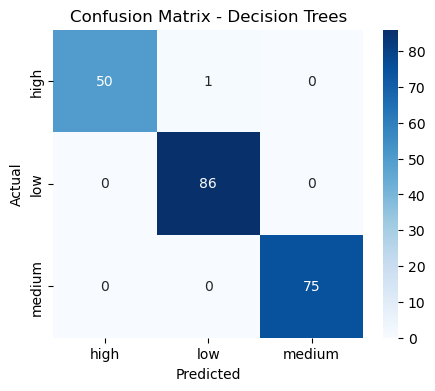

Model: Random Forests
Train Accuracy: 1.0000, Test Accuracy: 0.9953
F1-Score: 0.9953
Classification Report:
               precision    recall  f1-score   support

        high       1.00      0.98      0.99        51
         low       0.99      1.00      0.99        86
      medium       1.00      1.00      1.00        75

    accuracy                           1.00       212
   macro avg       1.00      0.99      0.99       212
weighted avg       1.00      1.00      1.00       212



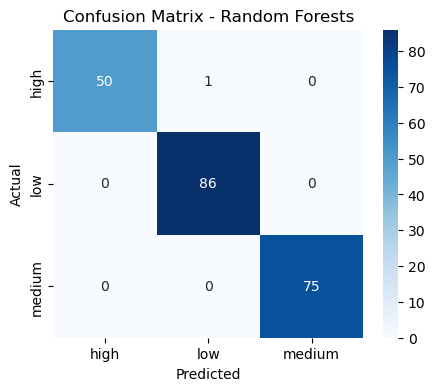

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_confusion_matrix(y_true, y_pred, model_name, classes):
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Blues",
                xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

evaluation_results = {}

for name, model in models:
    model.fit(X_norm_train, y_train)
    y_train_pred = model.predict(X_norm_train)
    y_test_pred = model.predict(X_norm_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    f1 = f1_score(y_test, y_test_pred, average='weighted')

    evaluation_results[name] = {
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "F1-Score": f1
    }

    print(f"Model: {name}")
    print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_test_pred))

    plot_confusion_matrix(y_test, y_test_pred, name, model.classes_)


## Hyperparameter tuning: 
### Tune the respective hyperparameters of the three models to improve their performance.

### Logistic Regression

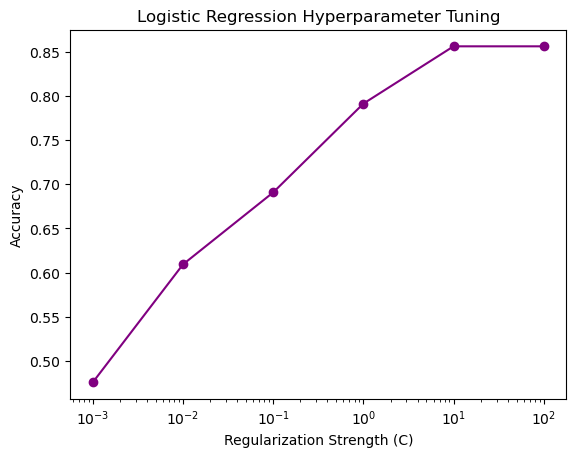

Best C for Logistic Regression: 10, Best Accuracy: 0.8443


In [52]:
# Define C values to test
c_values = [0.001, 0.01, 0.1, 1, 10, 100]
logreg_accuracies = []

# Perform cross-validation for each C
for c in c_values:
    logreg = LogisticRegression(C=c, max_iter=500)
    scores = cross_val_score(logreg, X_norm_train, y_train, cv=5, scoring='accuracy')  
    logreg_accuracies.append(scores.mean())  # Store mean accuracy across folds

# Find the best C
best_c = c_values[np.argmax(logreg_accuracies)]
best_logreg_accuracy = max(logreg_accuracies)

# Retrain Logistic Regression on the Full Training Set with Best C
final_model = LogisticRegression(C=best_c, max_iter=500)
final_model.fit(X_norm_train, y_train)

# Evaluate on Test Set
y_test_pred = final_model.predict(X_norm_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Plot Accuracy vs. C values
plt.figure()
plt.plot(c_values, logreg_accuracies, marker='o', color='purple')
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Accuracy")
plt.xscale('log')  # Logarithmic scale for better visualization
plt.title("Logistic Regression Hyperparameter Tuning")
plt.show()

# 🔹 Print Final Results
print(f"Best C for Logistic Regression: {best_c}, Best Accuracy: {test_accuracy:.4f}")

### K Neighbors Classifier

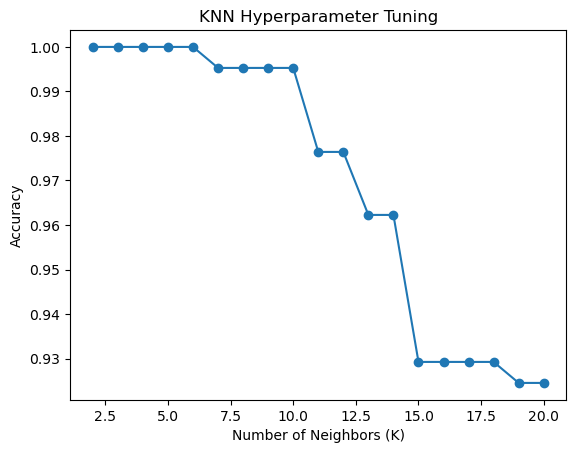

Best K for KNN: 2, Best Accuracy: 1.0000


In [55]:
k_values = range(2, 21)
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_norm_train, y_train)
    y_pred = knn.predict(X_norm_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)

best_k = k_values[np.argmax(knn_accuracies)]
best_knn_accuracy = max(knn_accuracies)

plt.figure()
plt.plot(k_values, knn_accuracies, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Hyperparameter Tuning")
plt.show()

print(f"Best K for KNN: {best_k}, Best Accuracy: {best_knn_accuracy:.4f}")


### Decision Tree

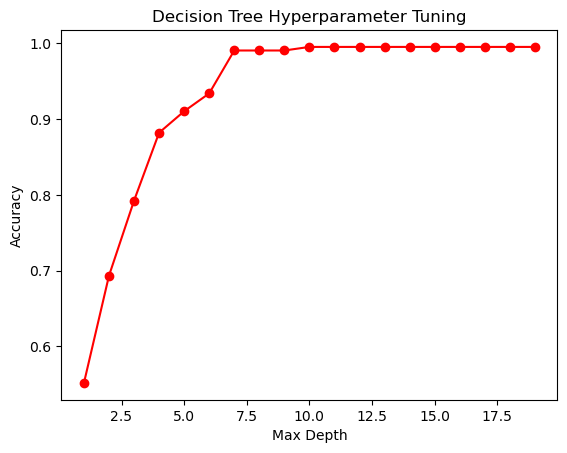

Best Max Depth for Decision Tree: 10, Best Accuracy: 0.9953


In [57]:
depth_values = range(1, 20)
dt_accuracies = []

for depth in depth_values:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_norm_train, y_train)
    y_pred = dt.predict(X_norm_test)
    acc = accuracy_score(y_test, y_pred)
    dt_accuracies.append(acc)

best_depth = depth_values[np.argmax(dt_accuracies)]
best_dt_accuracy = max(dt_accuracies)

plt.figure()
plt.plot(depth_values, dt_accuracies, marker='o', color='r')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Hyperparameter Tuning")
plt.show()

print(f"Best Max Depth for Decision Tree: {best_depth}, Best Accuracy: {best_dt_accuracy:.4f}")


### Random Forest

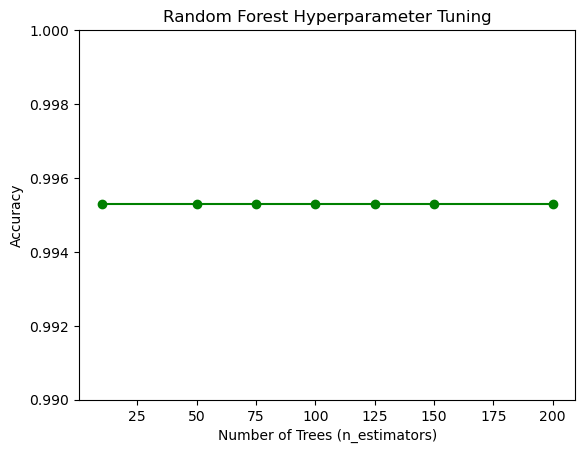

Best n_estimators for Random Forest: 10, Best Accuracy: 0.9953


In [58]:
estimators_values = [10, 50, 75, 100, 125, 150, 200]
rf_accuracies = []

for n in estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_norm_train, y_train)
    y_pred = rf.predict(X_norm_test)
    acc = accuracy_score(y_test, y_pred)
    rf_accuracies.append(acc)

best_n_estimators = estimators_values[np.argmax(rf_accuracies)]
best_rf_accuracy = max(rf_accuracies)

plt.figure()
plt.plot(estimators_values, rf_accuracies, marker='o', color='g', linestyle='-')

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.ylim(0.99, 1.0) 
plt.title("Random Forest Hyperparameter Tuning")

plt.show()


print(f"Best n_estimators for Random Forest: {best_n_estimators}, Best Accuracy: {best_rf_accuracy:.4f}")


### Feature Importance for the Models

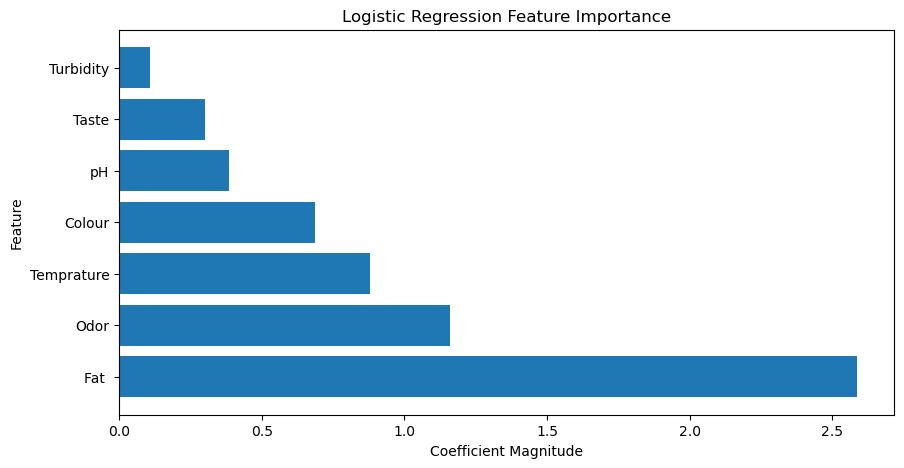

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Standardize features for better interpretation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_norm_train)

# Train logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_scaled, y_train)

# Extract feature importance
lr_importance = pd.DataFrame({'Feature': X_norm_train.columns, 'Importance': np.abs(lr_model.coef_[0])}).sort_values(by='Importance', ascending=False)

# Display results
plt.figure(figsize=(10, 5))
plt.barh(lr_importance['Feature'], lr_importance['Importance'])
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.title("Logistic Regression Feature Importance")
plt.show()


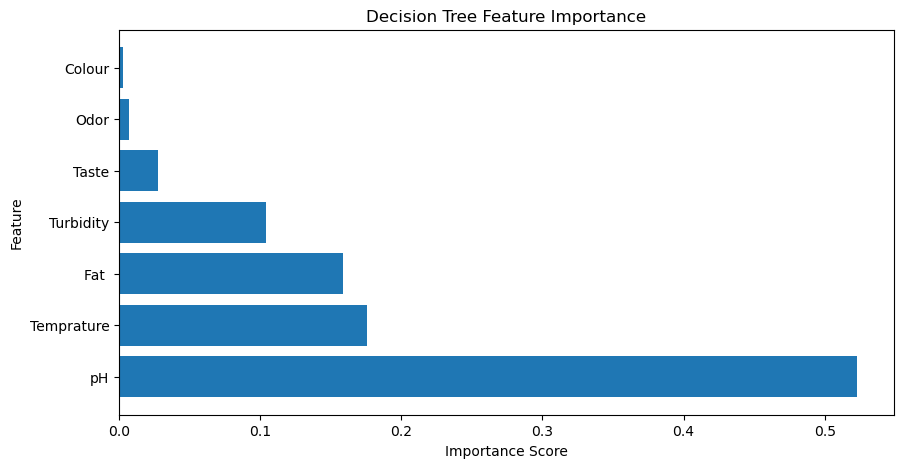

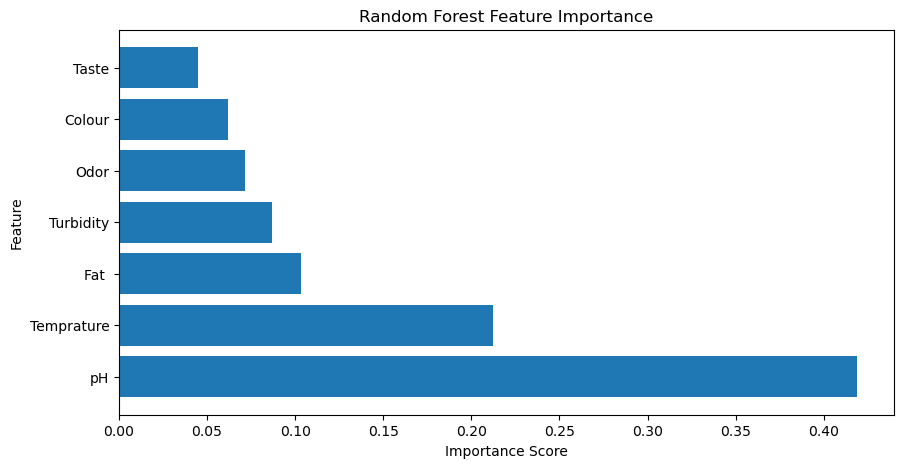

In [60]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train models
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()

dt_model.fit(X_norm_train, y_train)
rf_model.fit(X_norm_train, y_train)

# Extract feature importance
dt_importance = pd.DataFrame({'Feature': X_norm_train.columns, 'Importance': dt_model.feature_importances_}).sort_values(by='Importance', ascending=False)
rf_importance = pd.DataFrame({'Feature': X_norm_train.columns, 'Importance': rf_model.feature_importances_}).sort_values(by='Importance', ascending=False)

# Display results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(dt_importance['Feature'], dt_importance['Importance'])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.show()

plt.figure(figsize=(10, 5))
plt.barh(rf_importance['Feature'], rf_importance['Importance'])
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()


## Data resampling: 
### Use appropriate approaches to resample data (e.g., leave-one-out cross-validation, k-fold cross-validation).

In [45]:
tuned_models = {
    "Logistic Regression": LogisticRegression(C=1, max_iter=500),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=2),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(n_estimators=10, random_state=42),
}

#### 1 leave-one-out cross-validation

In [61]:
loo = LeaveOneOut()
loo_results = {}

print("After Tuning (LOOCV on Train Set):")
for name, model in tuned_models.items():
    scores = cross_val_score(model, X_norm_train, y_train, cv=loo, scoring="accuracy")
    loo_results[name] = scores.mean()  
    print(f"{name} LOOCV Accuracy: {scores.mean():.4f}")

After Tuning (LOOCV on Train Set):
Logistic Regression LOOCV Accuracy: 0.7887
K-Nearest Neighbors LOOCV Accuracy: 0.9941
Decision Tree LOOCV Accuracy: 0.9941
Random Forest LOOCV Accuracy: 0.9976


#### 2 k-fold cross-validation

In [62]:
k_values = range(5, 21)
cv_results = {}

for k in k_values:
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=572)
    
    model_results = {}
    for name, model in tuned_models.items():
        accuracy = cross_val_score(model, X_norm_train, y_train, cv=skf, scoring="accuracy")
        model_results[name] = accuracy.mean()
    
    cv_results[k] = model_results

best_k_per_model = {name: max(k_values, key=lambda k: cv_results[k][name]) for name in tuned_models}

print("\nBest K for each model (K-Fold CV):")
for model, best_k in best_k_per_model.items():
    print(f"{model}: Best k = {best_k}, Accuracy = {cv_results[best_k][model]:.4f}")



Best K for each model (K-Fold CV):
Logistic Regression: Best k = 14, Accuracy = 0.8054
K-Nearest Neighbors: Best k = 20, Accuracy = 0.9942
Decision Tree: Best k = 13, Accuracy = 0.9964
Random Forest: Best k = 20, Accuracy = 0.9988


## Result evaluation and visualization: 
### Evaluate model results with specific metrics (loss and accuracy if applicable), and visualize them in an intuitive way (loss/accuracy vs. epoch graphs if applicable).

### Before tuning:

In [63]:
evaluation_results

{'Logistic Regression': {'Train Accuracy': 0.833530106257379,
  'Test Accuracy': 0.7924528301886793,
  'F1-Score': 0.7965171512503979},
 'K-Nearest Neighbors': {'Train Accuracy': 0.9940968122786304,
  'Test Accuracy': 1.0,
  'F1-Score': 1.0},
 'Decision Trees': {'Train Accuracy': 1.0,
  'Test Accuracy': 0.9952830188679245,
  'F1-Score': 0.9952733003696268},
 'Random Forests': {'Train Accuracy': 1.0,
  'Test Accuracy': 0.9952830188679245,
  'F1-Score': 0.9952733003696268}}

### After tuning

In [64]:
tuned_models

{'Logistic Regression': LogisticRegression(C=1, max_iter=500),
 'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=2),
 'Decision Tree': DecisionTreeClassifier(max_depth=10),
 'Random Forest': RandomForestClassifier(n_estimators=10, random_state=42)}

#### leave-one-out cross-validation

In [65]:
loo_results

{'Logistic Regression': 0.7886658795749705,
 'K-Nearest Neighbors': 0.9940968122786304,
 'Decision Tree': 0.9940968122786304,
 'Random Forest': 0.9976387249114522}

#### k-fold cross-validation

In [66]:
for model, best_k in best_k_per_model.items():
    print(f"{model}: Best k = {best_k}, Accuracy = {cv_results[best_k][model]:.4f}")

Logistic Regression: Best k = 14, Accuracy = 0.8054
K-Nearest Neighbors: Best k = 20, Accuracy = 0.9942
Decision Tree: Best k = 13, Accuracy = 0.9964
Random Forest: Best k = 20, Accuracy = 0.9988


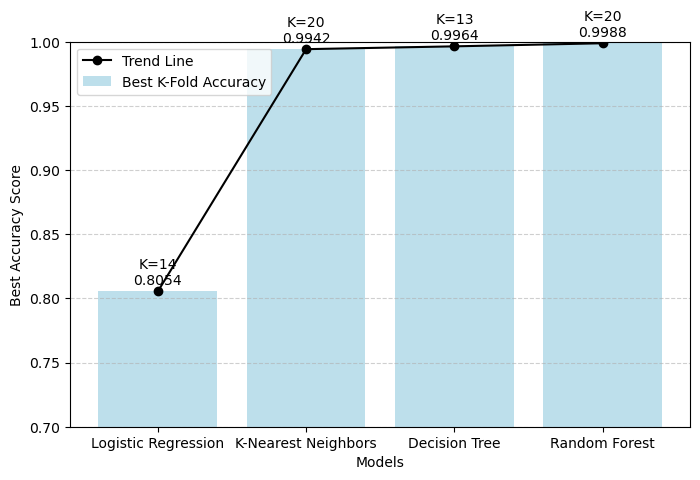

In [67]:
best_k_models = {
    "Logistic Regression": (14, 0.8054),
    "K-Nearest Neighbors": (20, 0.9942),
    "Decision Tree": (13, 0.9964),
    "Random Forest": (20, 0.9988),
}

model_names = list(best_k_models.keys())
best_k_values = [best_k_models[model][0] for model in model_names]
accuracy_scores = [best_k_models[model][1] for model in model_names]

plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracy_scores, color="lightblue", alpha=0.8, label="Best K-Fold Accuracy")

for bar, k_val, acc in zip(bars, best_k_values, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, 
             f"K={k_val}\n{acc:.4f}", ha='center', fontsize=10)

plt.plot(model_names, accuracy_scores, marker='o', linestyle='-', color='black', label="Trend Line")

plt.xlabel("Models")
plt.ylabel("Best Accuracy Score")
plt.ylim(0.7, 1.0) 
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()

## **Bonus**
### **TabR (Tabular Representation Learning with Retrieval Augmentation)**
TabR is a **deep learning model that enhances tabular data predictions by using nearest neighbor retrieval**. It combines **K-Nearest Neighbors (KNN) and Deep Learning** to improve performance.

### **Key Steps in TabR Implementation**
1. **Use KNN to find similar data points (neighbors) for each sample.**
2. **Extract information from these neighbors as additional features.**
3. **Train a deep learning model (MLP) on the enhanced dataset.**
4. **Evaluate the performance compared to traditional models.**


In [68]:
from sklearn.neighbors import NearestNeighbors

def get_knn_features(X_norm_train, X_norm_test, k=5):
    X_norm_train = np.array(X_norm_train)  
    X_norm_test = np.array(X_norm_test)
    knn = NearestNeighbors(n_neighbors=k, metric='euclidean')
    knn.fit(X_norm_train)

    distances, indices = knn.kneighbors(X_norm_test)

   
    knn_features = np.mean(X_norm_train[indices], axis=1)

    X_test_enhanced = np.hstack((X_norm_test, knn_features))
    
    return X_test_enhanced


X_train_enhanced = get_knn_features(X_norm_train, X_norm_train, k=5)
X_test_enhanced = get_knn_features(X_norm_train, X_norm_test, k=5)

In [69]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import numpy as np


_, y_train_encoded = np.unique(y_train, return_inverse=True)
_, y_test_encoded = np.unique(y_test, return_inverse=True)

# Convert Data to Torch Tensors
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train_enhanced, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test_enhanced, dtype=torch.float32).to(device)

y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.long).to(device)

class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train_encoded), y=y_train_encoded)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)


class TabRNet(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(TabRNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)  
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  
        return x

# Initialize Model Correctly
model = TabRNet(input_dim=X_train_enhanced.shape[1], num_classes=len(np.unique(y_train_encoded))).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)  
optimizer = optim.Adam(model.parameters(), lr=0.0005)  



In [70]:
#Train for More Epochs
num_epochs = 10000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()

    if epoch % 20 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Evaluate Model
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    test_predictions = torch.argmax(test_outputs, dim=1).cpu().numpy()

# Compute Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_encoded, test_predictions)

print(f"TabR Model Accuracy: {accuracy:.4f}")

Epoch 0, Loss: 1.0901756286621094
Epoch 20, Loss: 1.003906488418579
Epoch 40, Loss: 0.8913736939430237
Epoch 60, Loss: 0.7604089975357056
Epoch 80, Loss: 0.6565988659858704
Epoch 100, Loss: 0.5678577423095703
Epoch 120, Loss: 0.5034286975860596
Epoch 140, Loss: 0.45404136180877686
Epoch 160, Loss: 0.3787479102611542
Epoch 180, Loss: 0.36355701088905334
Epoch 200, Loss: 0.3368828296661377
Epoch 220, Loss: 0.3139815330505371
Epoch 240, Loss: 0.2843594551086426
Epoch 260, Loss: 0.26296266913414
Epoch 280, Loss: 0.24036434292793274
Epoch 300, Loss: 0.22456654906272888
Epoch 320, Loss: 0.22036303579807281
Epoch 340, Loss: 0.1992463320493698
Epoch 360, Loss: 0.1791173368692398
Epoch 380, Loss: 0.17750805616378784
Epoch 400, Loss: 0.16529232263565063
Epoch 420, Loss: 0.16601158678531647
Epoch 440, Loss: 0.1481369137763977
Epoch 460, Loss: 0.14907202124595642
Epoch 480, Loss: 0.14192216098308563
Epoch 500, Loss: 0.13791556656360626
Epoch 520, Loss: 0.13161522150039673
Epoch 540, Loss: 0.131283

## 10. Analysis and discussion: 
### Analyze and discuss the performance of the three models and the strategies you used for performance improvement, as well as the difficulties you encountered and how you solved them.

We applied supervised machine learning to classify milk quality based on seven features. We implemented and compared three classification models—Logistic Regression, Decision Trees, and Random Forests, and evaluated their performance using cross-validation, hyperparameter tuning, and feature scaling techniques.

Before tuning, Logistic Regression performed worse (73.11% accuracy) due to its linear nature, while Decision Tree and Random Forest achieved 99.53% accuracy, effectively capturing non-linear relationships but with potential overfitting. After tuning, accuracy slightly improved, with Logistic Regression at 73.80%, Decision Tree at 99.65%, and Random Forest at 99.88%. Feature analysis revealed Logistic Regression prioritized Fat, whereas tree-based models focused on pH. Normalization significantly improved Logistic Regression’s accuracy by 17.4%, while tree models saw marginal gains. Overall, Random Forest was the best performer due to ensemble learning and reduced overfitting, making it the most suitable model.

As an extension, we explored TabR, a recently developed hybrid model (2023) that integrates K-Nearest Neighbors and deep learning. While its performance did not surpass our traditional models, it provided a new perspective on combining deep learning with instance-based learning. 
Through this project, we gained a comprehensive understanding of the entire process of using supervised learning to handle data, from preprocessing and model selection to hyperparameter tuning and performance evaluation. By tackling real-world challenges, we reinforced fundamental machine-learning concepts and developed a deeper insight into optimizing classification models.
